In [1]:
N = ord("V") % 3 + 1
print(N)

3


## <a id="menu">Варіант 3. Дослідження втрат бронетранспортерів (БТР).</a>
1. Створіть функцію, яка приймає назву файлу та назву стовпця як параметр та повертає масив numpy зі значеннями стовпця.
2. Використовуючи функцію з попереднього завдання, створіть масив numpy зі значень стовпця «APC» (Armored personnel carrier).
3. Знайдіть добові втрати БТР.
4. Знайдіть 5 найбільших добових втрат БТР.
5. Визначте, скільки БТР було знищено влітку 2023 року.
6. Знайдіть середнє значення знищених БТР за 100-500 днів війни.
7. Створіть графік втрат БТР за останні 200 днів (починаючи з останньої дати в наборі даних)

### Поради:
1. Використовуйте csv.reader()функцію для читання файлу csv.
2. Пропустіть перший рядок (із заголовками стовпців).
3. Не використовуйте цикли чи інші ітераційні конструкції для обробки масивів numpy. Використовуйте лише зрізи та/або універсальні (векторизовані) функції.
4. Створіть функції до завдань 3-7 кожного варіанта.

#### <a href="#menu" id="task1">Створіть функцію, яка приймає назву файлу та назву стовпця як параметр та повертає масив numpy зі значеннями стовпця.<a/>

In [2]:
import csv
import numpy as np

def columnReader(fileName, columnName):
    arr = np.array([])
    with open(fileName, mode ='r') as file:
        csvFile = csv.reader(file)
        csvHeadings = next(csvFile)
        ind = csvHeadings.index(columnName)
        for row in csvFile:
            arr = np.append(arr, int(row[ind]))
    return arr

In [3]:
columnReader('russia_losses_equipment.csv', 'APC')

array([  516.,   706.,   706.,   816.,   846.,   862.,   900.,   939.,
         945.,   985.,   999.,  1036.,  1070.,  1105.,  1165.,  1205.,
        1226.,  1249.,  1279.,  1375.,  1435.,  1448.,  1470.,  1487.,
        1535.,  1556.,  1578.,  1597.,  1625.,  1640.,  1664.,  1694.,
        1710.,  1723.,  1735.,  1751.,  1776.,  1830.,  1844.,  1858.,
        1861.,  1891.,  1891.,  1895.,  1911.,  1923.,  1946.,  1964.,
        1968.,  1976.,  1982.,  2002.,  2041.,  2063.,  2087.,  2118.,
        2162.,  2205.,  2238.,  2258.,  2308.,  2342.,  2389.,  2418.,
        2445.,  2471.,  2519.,  2567.,  2610.,  2651.,  2686.,  2713.,
        2741.,  2764.,  2808.,  2856.,  2873.,  2900.,  2934.,  2958.,
        2974.,  3009.,  3043.,  3063.,  3090.,  3116.,  3141.,  3166.,
        3194.,  3213.,  3235.,  3246.,  3258.,  3270.,  3282.,  3302.,
        3343.,  3354.,  3366.,  3379.,  3392.,  3400.,  3416.,  3429.,
        3438.,  3450.,  3466.,  3484.,  3492.,  3503.,  3528.,  3545.,
      

#### <a href="#menu" id="task2">Використовуючи функцію з попереднього завдання, створіть масив numpy зі значень стовпця «APC» (Armored personnel carrier).</a>

In [5]:
arr = np.array(columnReader('russia_losses_equipment.csv', 'APC'))
print(arr)

[  516.   706.   706.   816.   846.   862.   900.   939.   945.   985.
   999.  1036.  1070.  1105.  1165.  1205.  1226.  1249.  1279.  1375.
  1435.  1448.  1470.  1487.  1535.  1556.  1578.  1597.  1625.  1640.
  1664.  1694.  1710.  1723.  1735.  1751.  1776.  1830.  1844.  1858.
  1861.  1891.  1891.  1895.  1911.  1923.  1946.  1964.  1968.  1976.
  1982.  2002.  2041.  2063.  2087.  2118.  2162.  2205.  2238.  2258.
  2308.  2342.  2389.  2418.  2445.  2471.  2519.  2567.  2610.  2651.
  2686.  2713.  2741.  2764.  2808.  2856.  2873.  2900.  2934.  2958.
  2974.  3009.  3043.  3063.  3090.  3116.  3141.  3166.  3194.  3213.
  3235.  3246.  3258.  3270.  3282.  3302.  3343.  3354.  3366.  3379.
  3392.  3400.  3416.  3429.  3438.  3450.  3466.  3484.  3492.  3503.
  3528.  3545.  3563.  3573.  3577.  3588.  3606.  3614.  3632.  3637.
  3645.  3659.  3687.  3704.  3720.  3726.  3736.  3737.  3744.  3744.
  3772.  3789.  3797.  3811.  3815.  3823.  3828.  3829.  3832.  3832.
  3866

#### <a href="#menu" id="task3">Знайдіть добові втрати БТР.</a>

In [6]:
def dailyAPCLosses(fileName, columnName):
    arr = np.array([])
    with open(fileName, mode ='r') as file:
        csvFile = csv.reader(file)
        csvHeadings = next(csvFile)
        ind = csvHeadings.index(columnName)
        day = csvHeadings.index('day')
        currentDay = 1
        previousDay = 0
        for row in csvFile:
            currentDay = currentDay + 1
            while int(row[day]) != currentDay:
                arr = np.append(arr, 0)
                currentDay = currentDay + 1
            else:
                arr = np.append(arr, int(row[ind]) - previousDay)
            previousDay = int(row[ind])
        
    return arr

In [7]:
arr = np.array(dailyAPCLosses('russia_losses_equipment.csv', 'APC'))
print(arr)

[516. 190.   0. 110.  30.  16.  38.  39.   6.  40.  14.  37.  34.  35.
  60.  40.  21.  23.  30.  96.  60.  13.  22.  17.  48.  21.  22.  19.
  28.  15.  24.  30.  16.  13.  12.  16.  25.  54.  14.  14.   3.  30.
   0.   4.  16.  12.  23.  18.   4.   8.   6.  20.  39.  22.  24.  31.
  44.  43.  33.  20.  50.  34.  47.  29.  27.  26.  48.  48.  43.  41.
  35.  27.  28.  23.  44.  48.  17.  27.  34.  24.  16.  35.  34.  20.
  27.  26.  25.  25.  28.  19.  22.  11.  12.  12.  12.  20.  41.  11.
  12.  13.  13.   8.  16.  13.   9.  12.  16.  18.   8.  11.  25.  17.
  18.  10.   4.  11.  18.   8.  18.   5.   8.  14.  28.  17.  16.   6.
  10.   1.   7.   0.  28.  17.   8.  14.   4.   8.   5.   1.   3.   0.
  34.   8.   5.   7.   6.  13.   7.   8.   9.  13.   8.   9.  12.   8.
   8.   8.   9.   7.   3.   8.   4.   6.  19.   4.  15.   6.  10.  14.
   8.   7.  11.  15.  11.  10.  17.  16.  17.  12.   6.   8.   5.   2.
   6.   3.   3.  12.  25.  18.  33.  21.  37.  27.  29.  25.  36.  37.
  18. 

#### <a href="#menu" id="task4">Знайдіть 5 найбільших добових втрат БТР.</a>

In [8]:
def threeMaxAPCLosses():
    arr = np.array(dailyAPCLosses('russia_losses_equipment.csv', 'APC'))
    top3 = np.argsort(arr)[::-1][:3]
    print(arr[top3])

threeMaxAPCLosses()   

[516. 190. 120.]


#### <a href="#menu" id="task5">Визначте, скільки БТР було знищено влітку 2023 року.</a>

In [20]:
def summerLosses(fileName, columnName):
    with open(fileName, mode ='r') as file:
        csvFile = csv.reader(file)
        csvHeadings = next(csvFile)
        ind = csvHeadings.index(columnName)
        date = csvHeadings.index('date')
        firstDayOfSummer = 0
        lastDayOfSummer = 0
        for row in csvFile:
            if '2023-06-01' in row[date]:
                firstDayOfSummer = int(row[ind])
            if '2023-08-31' in row[date]:
                lastDayOfSummer = int(row[ind])
    return lastDayOfSummer-firstDayOfSummer

In [10]:
summerLosses('russia_losses_equipment.csv', 'APC')

969

#### <a href="#menu" id="task6">Знайдіть середнє значення знищених БТР за 100-500 днів війни.</a>

In [14]:
def lastDaysAvg():
    arr = dailyAPCLosses('russia_losses_equipment.csv', 'APC')
    return np.average(arr[-500:])

lastDaysAvg()

12.694

#### <a href="#menu" id="task7">Створіть графік втрат БТР за останні 200 днів (починаючи з останньої дати в наборі даних)</a>

### Вимоги до графіків:
1. встановити тип лінії (пунктирна, пунктирна тощо);
2. графіки повинні бути підписані;
3. додайте легенду;
4. додати сітку та вказати колір і тип ліній;
5. додайте назву графіку, позначки осей і значення но осях;
6. змінити розмір графіку (наприклад, 8x16 дюймів) і розподільну здатність (наприклад, 100 dpi);
7. зберегти графік у файл формату png.

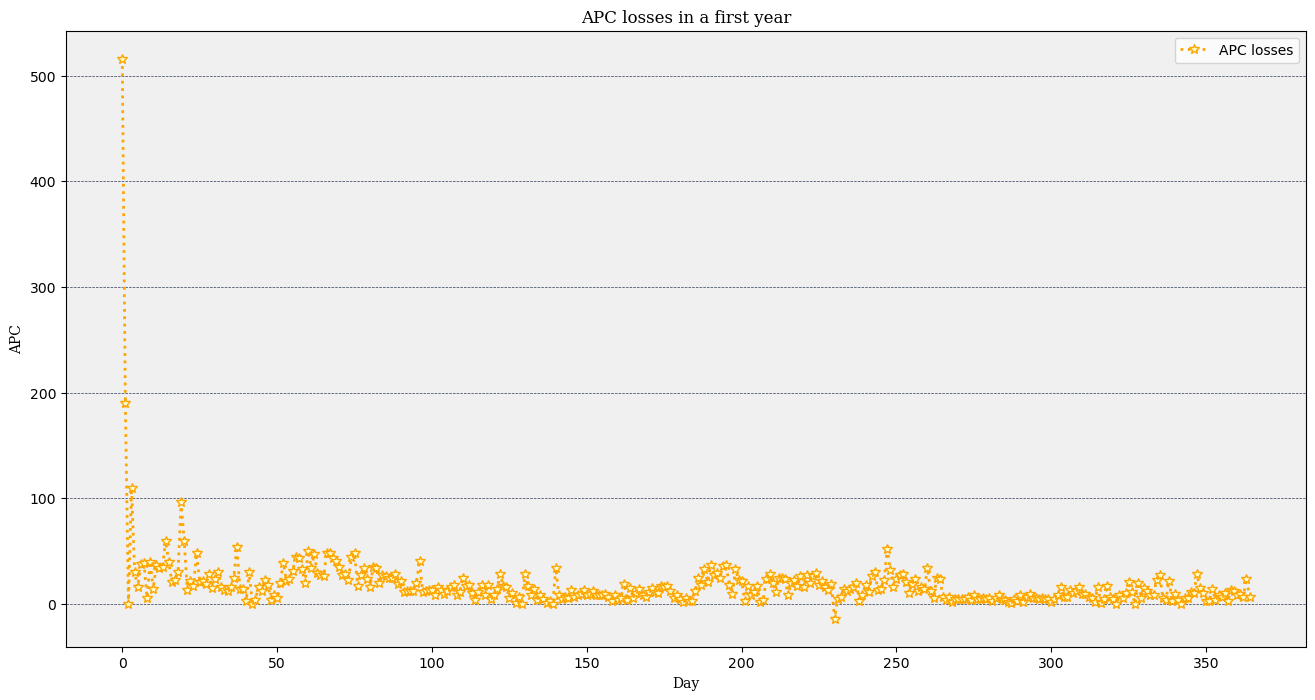

In [17]:
import matplotlib.pyplot as plt

def buildGraph():
    arr = np.array(dailyAPCLosses('russia_losses_equipment.csv', 'APC')[:365])
    %matplotlib inline
    x = np.arange(arr.size - 200, arr.size)
    y = arr

    plt.rcParams['figure.dpi']=100
    plt.figure(figsize=(16,8))

    ax = plt.axes()
    ax.set_facecolor("#F0F0F0")


    plt.plot(y, ls = ':', linewidth = '2', marker = '*', color='orange', ms = 7, mfc = '#FFFFCC', label='APC losses')

    font1 = {'family':'serif'}
    plt.title("APC losses in a first year", fontdict = font1)
    plt.xlabel("Day", fontdict = font1)
    plt.ylabel("APC", fontdict = font1)

    plt.legend()

    plt.grid(axis = 'y', color = '#2B3856', linestyle = '--', linewidth = 0.5)

    plt.savefig("APCLosses.png")

    plt.show()
    
buildGraph()